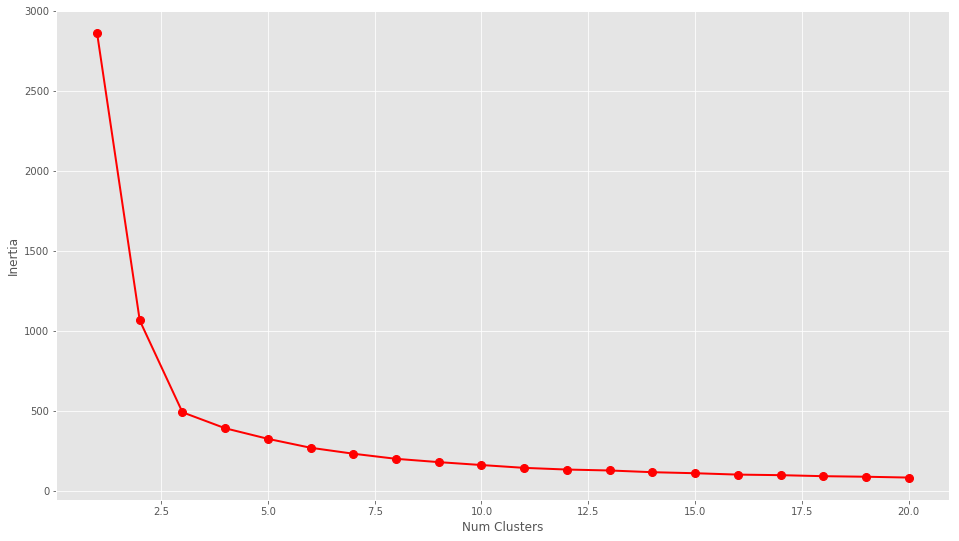

In [60]:
#Vamos a utilizar el arlgoritmo k-means
#Primero usamos method  Elbow para elegir el valor de k (en caso de no saberlo)
#Generamos gráfica para ver el k en el que está el punto codo

# -*- coding: utf-8 -*-
# Method Elbow: utilizo función de 'RicardoMoya' (https://jarroba.com/seleccion-del-numero-optimo-clusters/)

#Importamos librerías

%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import matplotlib.pyplot as pyplt
from sklearn.cluster import KMeans

# Constant
DATASET = "dataset1.txt"

LOOPS = 20
MAX_ITERATIONS = 10
INITIALIZE_CLUSTERS = 'k-means++'
CONVERGENCE_TOLERANCE = 0.001
NUM_THREADS = 8

def dataset_to_list_points(dir_dataset):
    """
    Read a txt file with a set of points and return a list of objects Point
    :param dir_dataset:
    """
    points = list()
    with open(dir_dataset, 'rt') as reader:
        for point in reader:
            points.append(np.asarray(list(map(float, point.split("::")))))
    return points


def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    #print(x,y)
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()


def select_clusters(dataset, loops, max_iterations, init_cluster, tolerance,
                    num_threads):
    # Read data set
    points = dataset_to_list_points(dataset)

    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        # Object KMeans
        kmeans = KMeans(n_clusters=i, max_iter=max_iterations,
                        init=init_cluster, tol=tolerance, n_jobs=num_threads)

        # Calculate Kmeans
        kmeans.fit(points)

        # Obtain inertia
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)


if __name__ == '__main__':
    select_clusters(DATASET, LOOPS, MAX_ITERATIONS, INITIALIZE_CLUSTERS,CONVERGENCE_TOLERANCE, NUM_THREADS)

In [61]:
#Tomamos k=3 porque hay punto codo
#Número de clusters:
k=3

In [62]:
#Importamos el dataset
#data = np.loadtxt('dataset.txt',delimiter='::')
data = pd.read_csv('dataset.txt',delimiter='::')
print(data.shape)
data.head()
#print(data)

(999, 2)


/home/magdalena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,V1,V2
0,1.857612,2.114034
1,2.348226,1.582650
2,1.998327,4.118143
3,1.714363,2.468640
4,1.656134,1.909956


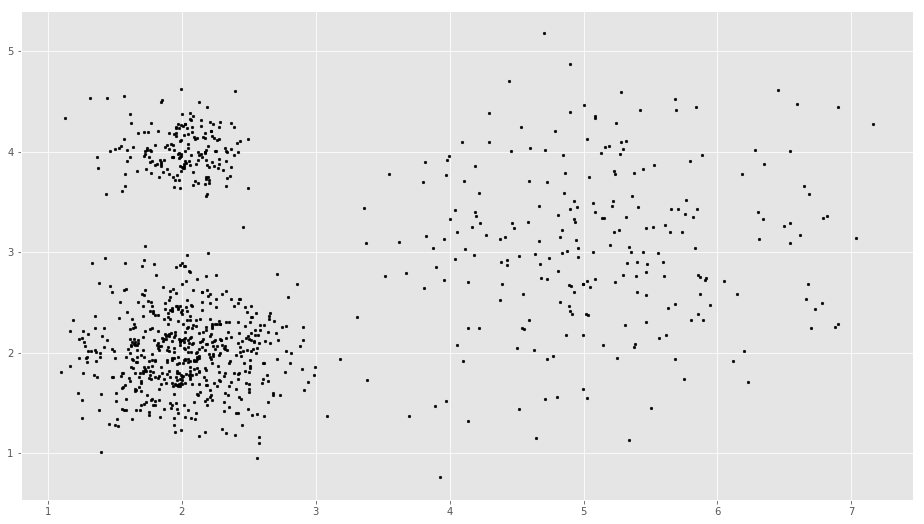

In [63]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [64]:
#Calcular distancia euclideana
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [65]:
#print(np.max(X))
# X coordenadas de centroides aleatorios
C_x = np.random.randint(0, np.max(X), size=k)
# Y coordenadas de centroides aleatorios
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[0. 3.]
 [6. 2.]
 [5. 6.]]


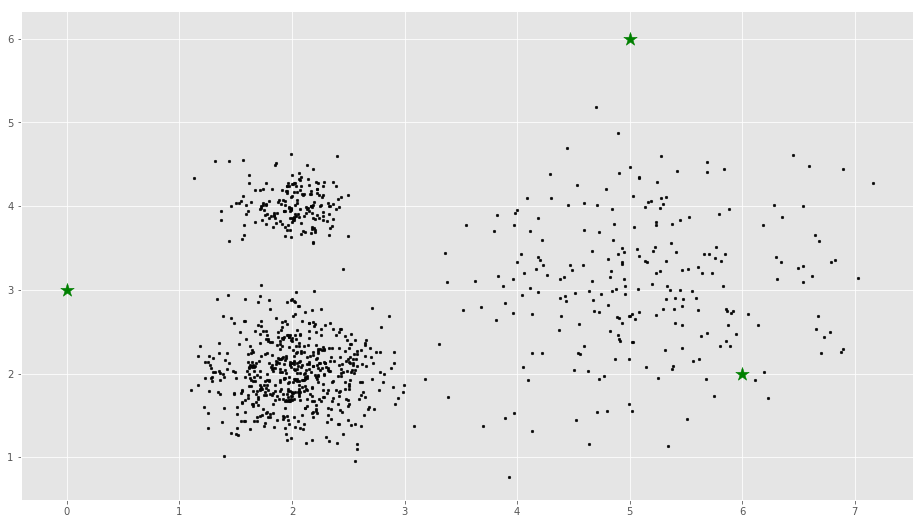

In [66]:
#Dibujamos centroides junto con valores
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [67]:
#Para guardar el valor de los centroides cuando se actualiza
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance entre nuevos centroides y viejos centroides
error = dist(C, C_old, None)
# Loop se ejecuta hasta que el error sea cero
while error != 0:
    # Asignamos cada valor a su cluster mas cercano
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Almaceno los antiguos valores del centroide
    C_old = deepcopy(C)
    # Buscamos nuevos centroides
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

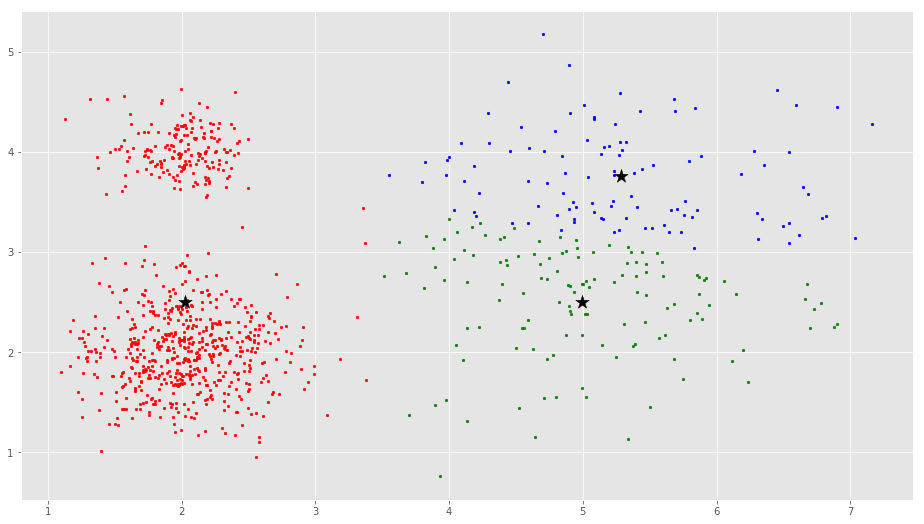

In [68]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')